TODO:<br>
- Refatorar código<br>
- Usar um Rede FCN

#### Baseando em:

- https://www.kaggle.com/code/vbookshelf/simple-cell-segmentation-with-keras-and-u-net/notebook

In [1]:
import pandas as pd
import cv2

In [2]:
import os

pasta = "dataset_todo/"

def files_path04(path):
    infos =[]
    for p, _, files in os.walk(os.path.abspath(path)):
        for file in files:
            infos.append(os.path.join(p, file))
    return infos

dados = files_path04(pasta)
tipo = [i.split("\\")[-3] for i in dados]
subgroup = [i.split("\\")[-2] for i in dados]
filename = [i.split("\\")[-1] for i in dados]
classe = [0 if x == "benigno" else 1 for x in tipo  ]
df = pd.DataFrame()
df['filename'] = filename
df['subgroup'] = subgroup
df['tipo'] = tipo
df['classe'] = classe

In [3]:
df

,filename,subgroup,tipo,classe
0,benigno10.png,53453eb2e4b05911cd6db1378,benigno,0
1,benigno11.png,53453eb2e4b05911cd6db1378,benigno,0
2,benigno12.png,53453eb2e4b05911cd6db1378,benigno,0
3,benigno13.png,53453eb2e4b05911cd6db1378,benigno,0
4,benigno210.png,53453eb2e4b05911cd6db1379,benigno,0
...,...,...,...,...
5620,maligno3077.png,53454d61e4b05911cd6db51aNodule 005,maligno,1
5621,maligno3078.png,53454d61e4b05911cd6db51aNodule 005,maligno,1
5622,maligno3079.png,53454d61e4b05911cd6db51aNodule 005,maligno,1
5623,maligno3080.png,53454d72e4b05911cd6db51dNodule 002,maligno,1


In [4]:
pasta = "dataset_seg/"

def files_path04(path):
    infos =[]
    for p, _, files in os.walk(os.path.abspath(path)):
        for file in files:
            infos.append(os.path.join(p, file))
    return infos

dados = files_path04(pasta)
tipo = [i.split("\\")[-3] for i in dados]
subgroup = [i.split("\\")[-2] for i in dados]
filename = [i.split("\\")[-1] for i in dados]
classe = [0 if x == "benigno" else 1 for x in tipo  ]
df_seg = pd.DataFrame()
df_seg['filename'] = filename
df_seg['subgroup'] = subgroup
df_seg['tipo'] = tipo
df_seg['classe'] = classe

In [5]:
df_seg

,filename,subgroup,tipo,classe
0,benigno10.png,1,benigno,0
1,benigno11.png,1,benigno,0
2,benigno12.png,1,benigno,0
3,benigno13.png,1,benigno,0
4,benigno1040.png,10,benigno,0
...,...,...,...,...
5620,maligno993.png,99,maligno,1
5621,maligno994.png,99,maligno,1
5622,maligno995.png,99,maligno,1
5623,maligno996.png,99,maligno,1


In [6]:
subgroup_todo = []
for i in df_seg['filename']:
    subgroup_todo.append(df[df['filename']==i]['subgroup'].values[0])
    

In [7]:
df_seg['subgroup_todo'] = subgroup_todo

In [8]:
import matplotlib.pyplot as plt

In [9]:
import cv2

In [10]:
df_seg

,filename,subgroup,tipo,classe,subgroup_todo
0,benigno10.png,1,benigno,0,53453eb2e4b05911cd6db1378
1,benigno11.png,1,benigno,0,53453eb2e4b05911cd6db1378
2,benigno12.png,1,benigno,0,53453eb2e4b05911cd6db1378
3,benigno13.png,1,benigno,0,53453eb2e4b05911cd6db1378
4,benigno1040.png,10,benigno,0,53453ec7e4b05911cd6db13f2
...,...,...,...,...,...
5620,maligno993.png,99,maligno,1,53454085e4b05911cd6db2058066
5621,maligno994.png,99,maligno,1,53454085e4b05911cd6db2058066
5622,maligno995.png,99,maligno,1,53454085e4b05911cd6db2058066
5623,maligno996.png,99,maligno,1,53454085e4b05911cd6db2058066


In [11]:
loc = 987

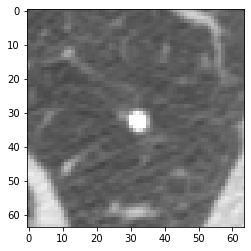

In [12]:
plt.imshow(cv2.imread("dataset_todo/"+df_seg.iloc[loc]['tipo']+"/"+df_seg.iloc[loc]['subgroup_todo']+"/"+df_seg.iloc[loc]['filename']))

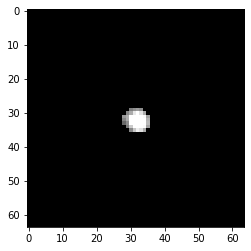

In [13]:
plt.imshow(cv2.imread("dataset_seg/"+df_seg.iloc[loc]['tipo']+"/"+df_seg.iloc[loc]['subgroup']+"/"+df_seg.iloc[loc]['filename']))

Criar auto encoder pra transformação

In [14]:
df_exp = df_seg.sample(frac=1)
df_exp

,filename,subgroup,tipo,classe,subgroup_todo
1889,benigno4952105.png,495,benigno,0,53454779e4b05911cd6db3f60
138,benigno129487.png,129,benigno,0,5345403ee4b05911cd6db1d55
3006,benigno74261.png,74,benigno,0,53453f87e4b05911cd6db18f114176
2398,benigno5942558.png,594,benigno,0,53454a4fe4b05911cd6db47f56093
949,benigno3081226.png,308,benigno,0,5345422be4b05911cd6db2e6141143
...,...,...,...,...,...
5464,maligno7513.png,75,maligno,1,5345402fe4b05911cd6db1c8Nodule 001
2377,benigno5902537.png,590,benigno,0,53454a21e4b05911cd6db47977353
45,benigno110397.png,110,benigno,0,53454002e4b05911cd6db1be16930
1019,benigno3191294.png,319,benigno,0,53454253e4b05911cd6db2f0Nodule 003


In [15]:
tam_df = len(df_exp)
df_train = df_exp.iloc[:int(tam_df*0.9)]
df_teste = df_exp.iloc[int(tam_df*0.9):]

In [16]:
path_treino_X = []
path_treino_Y = []
for index, row in df_train.iterrows():
    completo = "dataset_todo/"+row['tipo']+"/"+row['subgroup_todo']+"/"+row['filename']
    segmentado = "dataset_seg/"+row['tipo']+"/"+row['subgroup']+"/"+row['filename']
    path_treino_X.append(completo)
    path_treino_Y.append(segmentado)

In [17]:
from keras.models import Model, load_model
from keras.layers import Input
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
from tensorflow import keras

import numpy as np

import tensorflow as tf

In [18]:
IMG_HEIGHT = 64
IMG_WIDTH = 64
IMG_CHANNELS = 1
BATCH_SIZE = 32
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [19]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

In [42]:
def decode_and_resize(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_jpeg(img, channels=1)
    img = tf.image.resize(img, (IMG_WIDTH,IMG_HEIGHT))
    img = tf.image.convert_image_dtype(img, tf.float32)/255
    return img

def decode_and_resize_mask(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_jpeg(img, channels=1)
    img = tf.image.resize(img, (IMG_WIDTH,IMG_HEIGHT))
    img = tf.image.convert_image_dtype(img, tf.float32)/255
    img = (img >= 0.5).astype(np.uint8)
    img_inv = (img < 0.5).astype(np.uint8)
    return tf.concat(values=[img, img_inv],axis=-1)


def process_input(img_path_x, img_path_y):
    return decode_and_resize(img_path_x), decode_and_resize_mask(img_path_y)

def make_dataset(x_image, y_image):
    dataset = tf.data.Dataset.from_tensor_slices((x_image, y_image))
    dataset = dataset.shuffle(len(x_image))
    dataset = dataset.map(process_input)
    dataset = dataset.batch(BATCH_SIZE).prefetch(AUTOTUNE)
    return dataset

quebra_validacao = int(len(path_treino_X)*0.9)

dataset = make_dataset(path_treino_X[:quebra_validacao], path_treino_Y[:quebra_validacao])
valid_dataset = make_dataset(path_treino_X[quebra_validacao:], path_treino_Y[quebra_validacao:])

(64, 64)


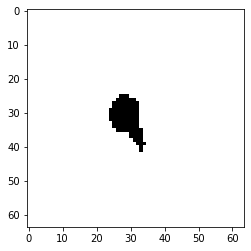

In [53]:
for i,j in dataset:
    print(j[0][:, :, 0 ].shape)
    plt.imshow(j[0][:, :, 1 ],cmap = "gray")
    break

## UNET

In [56]:
#https://www.kaggle.com/code/vbookshelf/simple-cell-segmentation-with-keras-and-u-net/notebook

inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))

c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (inputs)
c1 = Dropout(0.1) (c1)
c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c1)
p1 = MaxPooling2D((2, 2)) (c1)

c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p1)
c2 = Dropout(0.1) (c2)
c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c2)
p2 = MaxPooling2D((2, 2)) (c2)

c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p2)
c3 = Dropout(0.2) (c3)
c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c3)
p3 = MaxPooling2D((2, 2)) (c3)

c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p3)
c4 = Dropout(0.2) (c4)
c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c4)
p4 = MaxPooling2D(pool_size=(2, 2)) (c4)

c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p4)
c5 = Dropout(0.3) (c5)
c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c5)

u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (c5)
u6 = concatenate([u6, c4])
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u6)
c6 = Dropout(0.2) (c6)
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c6)

u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u7)
c7 = Dropout(0.2) (c7)
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c7)

u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u8)
c8 = Dropout(0.1) (c8)
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c8)

u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u9)
c9 = Dropout(0.1) (c9)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c9)

outputs = Conv2D(2, (1, 1), activation='sigmoid') (c9)

model = Model(inputs=[inputs], outputs=[outputs])

model.compile(optimizer='adam', loss='binary_crossentropy')

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 64, 64, 1)]  0           []                               
                                                                                                  
 conv2d_38 (Conv2D)             (None, 64, 64, 16)   160         ['input_3[0][0]']                
                                                                                                  
 dropout_18 (Dropout)           (None, 64, 64, 16)   0           ['conv2d_38[0][0]']              
                                                                                                  
 conv2d_39 (Conv2D)             (None, 64, 64, 16)   2320        ['dropout_18[0][0]']             
                                                                                            

                                                                                                  
 concatenate_11 (Concatenate)   (None, 64, 64, 32)   0           ['conv2d_transpose_11[0][0]',    
                                                                  'conv2d_39[0][0]']              
                                                                                                  
 conv2d_54 (Conv2D)             (None, 64, 64, 16)   4624        ['concatenate_11[0][0]']         
                                                                                                  
 dropout_26 (Dropout)           (None, 64, 64, 16)   0           ['conv2d_54[0][0]']              
                                                                                                  
 conv2d_55 (Conv2D)             (None, 64, 64, 16)   2320        ['dropout_26[0][0]']             
                                                                                                  
 conv2d_56

In [57]:
filepath = "model_seg_tutorial_unet.h5"

earlystopper = EarlyStopping(patience=5, verbose=1)

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min')

callbacks_list = [earlystopper, checkpoint]

history = model.fit(dataset, validation_data=valid_dataset, batch_size=16, epochs=500, 
                    callbacks=callbacks_list)


Epoch 1/500
143/143 [==============================] - ETA: 0s - loss: 0.1125
Epoch 1: val_loss improved from inf to 0.06430, saving model to model_seg_tutorial_unet.h5
143/143 [==============================] - 14s 35ms/step - loss: 0.1125 - val_loss: 0.0643
Epoch 2/500
142/143 [============================>.] - ETA: 0s - loss: 0.0521
Epoch 2: val_loss improved from 0.06430 to 0.05002, saving model to model_seg_tutorial_unet.h5
143/143 [==============================] - 4s 26ms/step - loss: 0.0520 - val_loss: 0.0500
Epoch 3/500
141/143 [============================>.] - ETA: 0s - loss: 0.0449
Epoch 3: val_loss improved from 0.05002 to 0.04320, saving model to model_seg_tutorial_unet.h5
143/143 [==============================] - 4s 26ms/step - loss: 0.0449 - val_loss: 0.0432
Epoch 4/500
142/143 [============================>.] - ETA: 0s - loss: 0.0433
Epoch 4: val_loss did not improve from 0.04320
143/143 [==============================] - 4s 25ms/step - loss: 0.0433 - val_loss: 0.0435

Teste

In [58]:
path_teste_X = []
path_teste_Y = []
for index, row in df_teste.iterrows():
    completo = "dataset_todo/"+row['tipo']+"/"+row['subgroup_todo']+"/"+row['filename']
    segmentado = "dataset_seg/"+row['tipo']+"/"+row['subgroup']+"/"+row['filename']
    path_teste_X.append(completo)
    path_teste_Y.append(segmentado)

In [59]:
model.load_weights(filepath)

In [60]:
dataset_teste = make_dataset(path_teste_X, path_teste_Y)

In [61]:
imagem_y =[]
imagem_x =[]
for x, y in dataset_teste:
    imagem_x.append(x)
    imagem_y.append(y)
    
    

In [94]:
batch_teste = 1
image_no_bacht_teste = 15
label_seg = 0

In [95]:
test_preds = model.predict(imagem_x[batch_teste])

In [96]:
#preds_test_thresh = (test_preds[:,:,0] >= 0.5).astype(np.uint8)
preds_test_thresh = test_preds[image_no_bacht_teste][:,:,label_seg]

In [97]:
preds_test_thresh.shape

(64, 64)

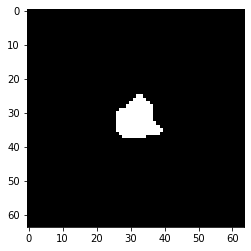

In [98]:
plt.imshow(imagem_y[batch_teste][image_no_bacht_teste][:,:,label_seg], cmap='gray')

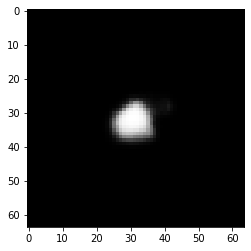

In [99]:
plt.imshow(preds_test_thresh, cmap='gray')